# Credit Card Fraud Machine Learning Model

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Data Wrangling](#data-wrangling)
        - [Cleaning Headers](#cleaning-headers)
        - [Dataset Allocation](#dataset-allocation)
- [Machine Learning Model Training, Validation, and Hyperparameter Tuning](#machine-learning-model-training-validation-and-hyperparameter-tuning)
    - [Decision Tree Model](#decision-tree-model)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

Credit card company XYZ wants to reduce fraud by detecting suspicious credit card activities from their customers. To solve this problem credit card company XYZ wants to implement a machine learning model to analyze customer purchases and detect if credit card fraud is being committed. To solve this classification task, my analysis will utilize multiple machine learning models to find the optimal model that yields the highest accuracy score for credit card company XYZ.

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.dummy import DummyClassifier

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('creditcard.csv', sep=',')
except:
    df = pd.read_csv('/datasets/creditcard.csv', sep=',')

[Back to Table of Contents](#back)

## Pre-Processing Data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Duplicates

In [4]:
# Checking for duplicates
df.duplicated().sum()

1081

In [5]:
# Removing duplicates
df = df.drop_duplicates()

# Checking for duplicates
print(df.duplicated().sum())

0


[Back to Table of Contents](#back)

### Missing Values

In [6]:
# Checking for null values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

[Back to Table of Contents](#back)

### Data Wrangling

#### Cleaning Headers

In [7]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#checking for snakecase format
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Renaming column names to snake_case format
df = df.rename(columns={'Time': 'time',
                        'V1': 'v1',
                        'V2': 'v2',
                        'V3': 'v3',
                        'V4': 'v4',
                        'V5': 'v5',
                        'V6': 'v6',
                        'V7': 'v7',
                        'V8': 'v8',
                        'V9': 'v9',
                        'V10': 'v10',
                        'V11': 'v11',
                        'V12': 'v12',
                        'V13': 'v13',
                        'V14': 'v14',
                        'V15': 'v15',
                        'V16': 'v16',
                        'V17': 'v17',
                        'V18': 'v18',
                        'V19': 'v19',
                        'V20': 'v20',
                        'V21': 'v21',
                        'V22': 'v22',
                        'V23': 'v23',
                        'V24': 'v24',
                        'V25': 'v25',
                        'V26': 'v26',
                        'V27': 'v27',
                        'V28': 'v28',
                        'Amount': 'amount',
                        'Class': 'class'})
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

[Back to Table of Contents](#back)

#### Dataset Allocation

In [13]:
# # Splitting the total dataset into a training dataset, a testing dataset, and a validation dataset 
# for our machine learning model set at a 3:1:1 ratio using the train_test_split function
train_valid, test = train_test_split(df,
                                     test_size=0.20,
                                     random_state=12345)

train, valid = train_test_split(train_valid,
                                test_size=0.25,
                                random_state=12345)

print(train.shape, '%.2f'% round(len(train) / (len(train) + len(valid) + len(test)), 1))
print(valid.shape, '%.2f'% round(len(valid) / (len(train) + len(valid) + len(test)), 1))
print(test.shape, '%.2f'% round(len(test) / (len(train) + len(valid) + len(test)), 1))

(170235, 31) 0.60
(56745, 31) 0.20
(56746, 31) 0.20


Observation:

- About 60% of the data has been allocated into the training dataset, and about 20% for the validation and test datasets

In [14]:
# Separating our target column from the feature columns of each analysis groups
features_train = train.drop(['class'], axis=1)
target_train = train['class']

features_valid = valid.drop(['class'], axis=1)
target_valid = valid['class']

features_test = test.drop(['class'], axis=1)
target_test = test['class']

[Back to Table of Contents](#back)

## Machine Learning Model Training, Validation, and Hyperparameter Tuning

### Decision Tree Model

In [15]:
# Creating a function that can calculate the accuracy score for a decision tree based on its max_depth parameter
def dectree_func (depth):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)
    predictions_valid = tree_model.predict(features_valid)
    return accuracy_score(target_valid, predictions_valid)

In [16]:
# Creating a new dataframe to find the optimal max depth value for the optimal accuracy score
dtree = pd.DataFrame({1: [dectree_func(1)],
                      2: [dectree_func(2)],
                      3: [dectree_func(3)],
                      4: [dectree_func(4)],
                      5: [dectree_func(5)],
                      6: [dectree_func(6)],
                      7: [dectree_func(7)],
                      8: [dectree_func(8)],
                      9: [dectree_func(9)],
                      10: [dectree_func(10)]})
print(dtree)

        1         2         3         4         5         6         7   \
0  0.99926  0.999366  0.999366  0.999348  0.999454  0.999471  0.999559   

         8         9         10  
0  0.999524  0.999401  0.999489  


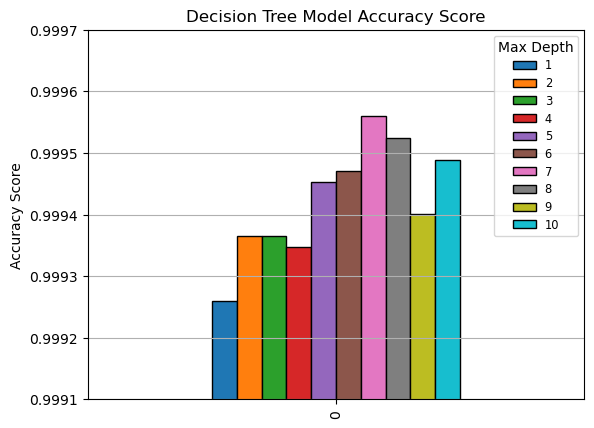

In [17]:
# Visualizing decision tree model accuracy score
dtree.plot(kind='bar',
           edgecolor='black')
plt.title('Decision Tree Model Accuracy Score')
plt.ylim([0.9991, 0.9997])
plt.ylabel('Accuracy Score')
plt.legend(title='Max Depth',
           fontsize='8.25',
           loc='upper right')
plt.grid(axis='y')
plt.show()

Observation:

- For the decision tree model, the optimal maximum tree depth would be 7
- A maximum depth of 7 yields the highest accuracy score of 0.999559
- Note: The maximum depth of 1 yields the lowest accuracy score of 0.999559 is still predicting the correct score 99%+ of the time which is very high by industry standards


[Back to Table of Contents](#back)

### Random Forest Model

In [18]:
# For the random forest model we will change the max_depth value to the n_estimators value to find the highest accuracy score
def randforest (est):
    rforest_model = RandomForestClassifier(random_state=12345, n_estimators=est)
    rforest_model.fit(features_train, target_train)
    score = rforest_model.score(features_valid, target_valid)
    return score

In [19]:
# Creating a dataframe to store the optimal accuracy scores from the random forest model
rand_forest = pd.DataFrame({11: [randforest(11)],
                            12: [randforest(12)],
                            13: [randforest(13)],
                            14: [randforest(14)],
                            15: [randforest(15)]})
print(rand_forest)

         11        12        13        14        15
0  0.999595  0.999577  0.999612  0.999612  0.999595


Note: Estimator values 1-10 and 16-20 scores were significantly lower than the other values were removed to reduce cell processing time. 

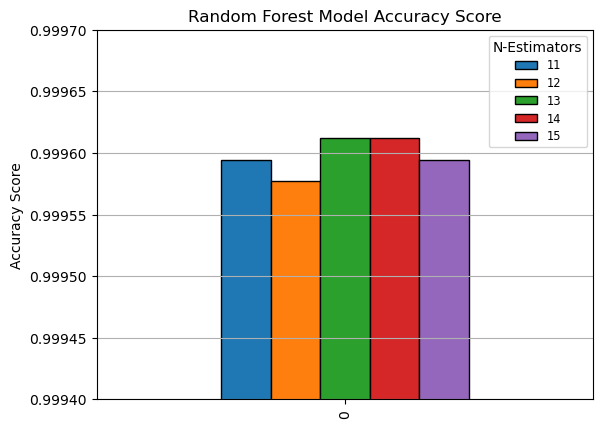

In [20]:
# Visualizing random forest model accuracy score
rand_forest.plot(kind='bar',
                 edgecolor='black')
plt.title('Random Forest Model Accuracy Score')
plt.ylim([0.9994, 0.9997])
plt.ylabel('Accuracy Score')
plt.legend(title='N-Estimators',
           fontsize='8.25',
           loc='upper right')
plt.grid(axis='y')
plt.show()

Observation:

- The optimal maximum accuracy score for the random forest model n estimator value is 13 or 14 (tied)
- The n estimator of 13 or 14 yields the highest accuracy score of 0.999612
- Note: Exactly like the decision tree model the lowest accuracy score in this model still predicts the correct score 99%+ of the time which is very high by industry standards


[Back to Table of Contents](#back)

### Logistic Regression Model

In [21]:
# Training the logistic regression model and calculating the accuracy score 
logreg_model = LogisticRegression(random_state=12345, solver='liblinear')
logreg_model.fit(features_train, target_train) 
score_train = logreg_model.score(features_train, target_train) 
score_valid = logreg_model.score(features_valid, target_valid)

In [22]:
# Creating a dataframe to chart our results from the logistic regression model
lr = pd.DataFrame({'training_score': [score_train],
                   'valid_score': [score_valid]})
print(lr)

   training_score  valid_score
0        0.998855     0.998855


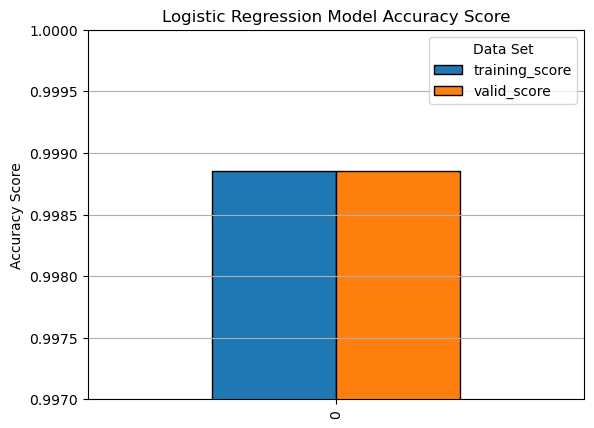

In [23]:
# Visualizing logistic regression model accuracy score# 
lr.plot(kind='bar',
        edgecolor='black')
plt.title('Logistic Regression Model Accuracy Score')
plt.ylim([0.997, 1])
plt.ylabel('Accuracy Score')
plt.legend(title='Data Set',
           loc='upper right')
plt.grid(axis='y')
plt.show()

Observation:

- 

[Back to Table of Contents](#back)

## Machine Learning Model Testing

### Decision Tree Model

In [24]:
# Now we use the same models as before except now we use the test dataset instead of the valid dataset
dtree_model = DecisionTreeClassifier(random_state=12345, max_depth=7)
dtree_model.fit(features_train, target_train)
predictions_test = dtree_model.predict(features_test)
dt_score = accuracy_score(target_test, predictions_test)
print('Decision Tree Model Accuracy Score =', dt_score)

Decision Tree Model Accuracy Score = 0.999


### Random Forest Model

In [25]:
# Using the test dataset instead of the valid dataset
rforest_model = RandomForestClassifier(random_state=12345, n_estimators=13)
rforest_model.fit(features_train, target_train)
rf_score = rforest_model.score(features_test, target_test)
print('Random Forest Model Accuracy Score =', rf_score)

Random Forest Model Accuracy Score = 0.999


### Logistic Regression Model

In [26]:
# Using the test dataset instead of the valid dataset
score_test = logreg_model.score(features_test, target_test)
print('Logistic Regression Model Accuracy Score =', score_test)

Logistic Regression Model Accuracy Score = 0.999


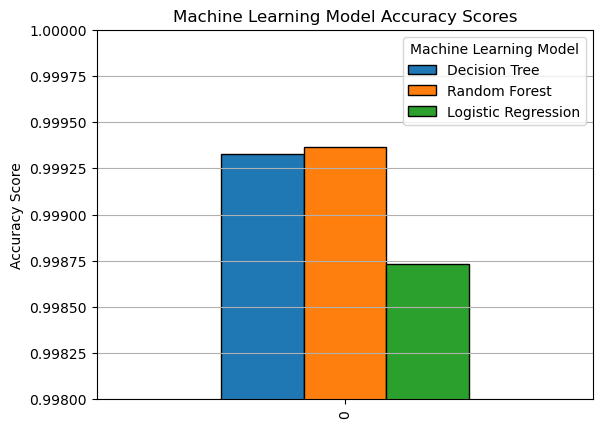

In [29]:
# Creating a dataframe with all the model test set results
model_scores = pd.DataFrame({'Decision Tree': [dt_score],
                             'Random Forest': [rf_score],
                             'Logistic Regression': [score_test]})

# Plotting the various models using the test data
model_scores.plot(kind='bar',
                  edgecolor='black')
plt.title('Machine Learning Model Accuracy Scores')
plt.ylim([0.998, 1])
plt.ylabel('Accuracy Score')
plt.legend(title='Machine Learning Model',
           loc='upper right')
plt.grid(axis='y')
plt.show()

Observation:

- 

[Back to Table of Contents](#back)

## Sanity Check

In [32]:
# Training the dummy classifier model
dclass = DummyClassifier(strategy='most_frequent')
dclass.fit(features_train, target_train)
dclass_score = dclass.score(features_test, target_test)
print(dclass_score)

0.9982201388644133


In [31]:
# Comparing the random forest accuracy score to the dummy classifier score
try:
  assert rf_score > dclass_score
  print('Sanity Check Passed')
except:
  print('Sanity Check Failed')

Sanity Check Passed


Observation:

- The sanity check passed and the random forest accuracy score is higher than the dummy classifier accuracy score

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

Machine Learning Group - ULB. (2017). Credit Card Fraud Detection, Version 3. Retrieved February 3, 2025 from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data).

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics

[Back to Table of Contents](#back)